# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [27]:
# 1. LIBRARIES IMPORT
# 2. PRIMARY DATA OBSERVATION


In [28]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [29]:
# LEITURA INICIAL DOS DADOS

auto_industry = pd.read_csv('auto_industry.csv')
print("Data Sample:")
auto_industry.sample(10)

Data Sample:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
248,36.1,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc
352,29.9,4,98.0,65.0,2380,20.7,81,usa,ford escort 2h
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
259,20.8,6,200.0,85.0,3070,16.7,78,usa,mercury zephyr
91,13.0,8,400.0,150.0,4464,12.0,73,usa,chevrolet caprice classic
368,27.0,4,112.0,88.0,2640,18.6,82,usa,chevrolet cavalier wagon


In [30]:
# OBSERVAÇÃO INICIAL: COLUMNS DATATYPES
auto_industry.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [31]:
auto_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [32]:
# OBSERVAÇÃO INICIAL: MEDIDAS DE DISPERÇÃO DOS ATRIBUTOS
auto_industry.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [33]:
# OBSERVAÇÃO INICIAL: VERIFICANDO SE EXISTEM REGISTROS DUPLICADOS
auto_industry.duplicated().sum()

0

In [34]:
# OBSERVAÇÃO INICIAL: FORMA DOS DATATYPES. EXISTE ALGUMA VARIÁVEL COM VALORES NULL, NAN OU ""?
print("Records:")
print(auto_industry.shape)

print("\n" + "=>> ISNA:")
print(auto_industry.isna().sum()) 

print("\n" + "=>> ISNULL:")
print(auto_industry.isnull().sum()) 

print("\n" + "=>>" ":")
np.where(auto_industry.applymap(lambda x: x== ' '))


Records:
(398, 9)

=>> ISNA:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>> ISNULL:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>>:


(array([], dtype=int64), array([], dtype=int64))

In [35]:
# DROPPING 6 NULL LINES 
auto_industry.dropna(inplace=True)
print(auto_industry.shape)

(392, 9)


In [36]:
def validate_column_categorical(value):
    if type(value)==str and (re.search('[a-z]+',value) or re.search('[A-Z]+',value)):
        return True
    return False

In [37]:
# VALIDATING COMPLETION OF CATEGORIC COLUMNS
auto_industry[['origin', 'name']].applymap(validate_column_categorical).value_counts()

origin  name
True    True    392
dtype: int64

## Calcule quantos modelos foram lançados em anos pares

In [38]:
auto_industry.name.nunique()

301

In [39]:
#CONFERIR SE CONTO COM ÚNICO NOME
models_launched_in_even_years = auto_industry.name[auto_industry.model_year.map(lambda x: x%2== 0)].nunique()
print(f"Models launched in even years: {models_launched_in_even_years}")

Models launched in even years: 180


## Crie uma coluna para a marca do veículo e outra para o nome

In [40]:
auto_industry[['brand', 'name']] = auto_industry.name.str.split(" ", 1,expand=True).rename(columns = {0: 'brand', 1: 'name'})

In [41]:
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


## É posível identificar alguma relação entre mpg e acceleration?

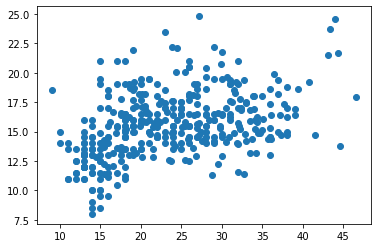

In [42]:
# OBSERVANDO POSSIVEL RELAÇÃO:
plt.scatter(auto_industry.mpg,auto_industry.acceleration)
plt.show()

# EXISTE UMA RELAÇÃO ENTRE AS VARIAVIES, MAS NÃO TÃO FORTE

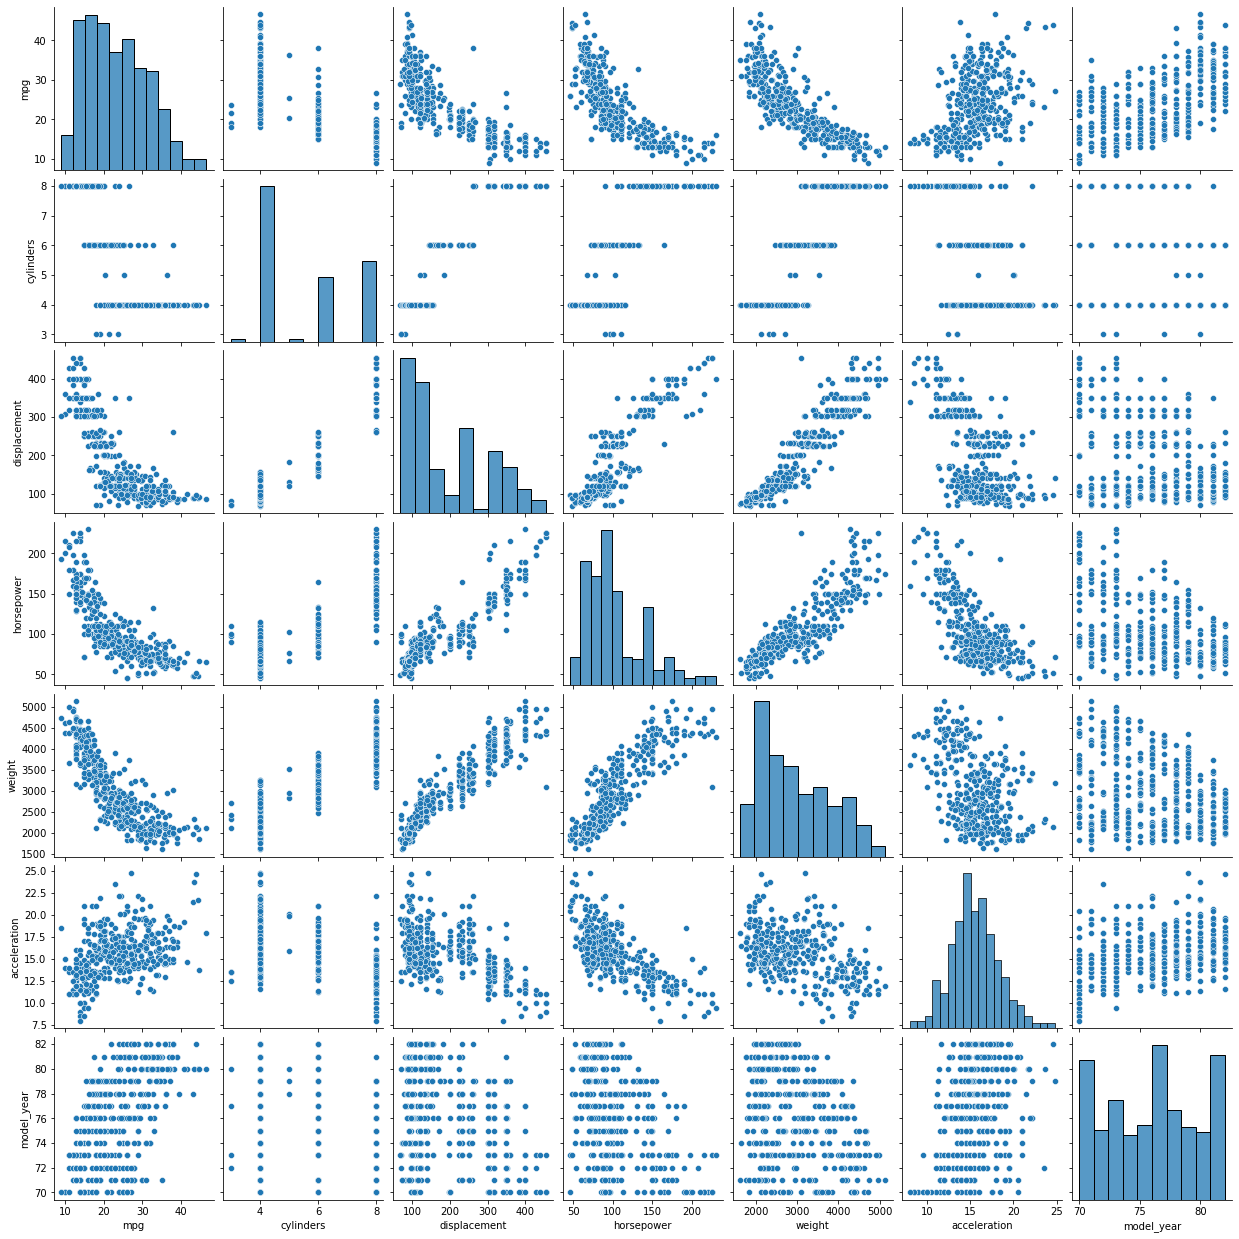

In [43]:
sns.pairplot(auto_industry)


## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [44]:
auto_industry_usa = auto_industry.groupby(by=['origin']).get_group('usa')
auto_industry_usa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [45]:
auto_industry.drop_duplicates(inplace=True)
auto_industry['Km/L'] = auto_industry['mpg'] * 0.425
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford,7.225


In [46]:
def capitalize_column(column):
    return column.capitalize()

In [47]:
auto_industry.columns = auto_industry.columns.map(capitalize_column)
auto_industry.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Name,Brand,Km/l
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford,7.225


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [51]:
pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['Model_year'], columns=['Cylinders'], values=['Mpg'], aggfunc=np.mean)
#table = pd.pivot_table(data=df,index=['Sex'])
pivot_table_mpg

Mpg                                       
Cylinders      3          4     5          6          8
Model_year                                             
70           NaN  25.285714   NaN  20.500000  14.111111
71           NaN  27.666667   NaN  18.000000  13.428571
72          19.0  23.428571   NaN        NaN  13.615385
73          18.0  22.727273   NaN  19.000000  13.200000
74           NaN  27.800000   NaN  17.333333  14.200000
75           NaN  25.250000   NaN  17.583333  15.666667
76           NaN  26.766667   NaN  20.000000  14.666667
77          21.5  29.107143   NaN  19.500000  16.000000
78           NaN  29.576471  20.3  19.066667  19.050000
79           NaN  31.525000  25.4  22.950000  18.630000
80          23.7  34.817391  36.4  25.900000        NaN
81           NaN  32.730000   NaN  23.428571  26.600000
82           NaN  32.407407   NaN  28.333333        NaN

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

In [ ]:
tt

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 